# LINEAR REGRESSION 

## Importing dependencies 

In [48]:
# Importing necessary packages 
%pip install pandas 
%pip install numpy
%pip install matplotlib
%pip install scikitlearn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement scikitlearn (from versions: none)

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
ERROR: No matching distribution found for scikitlearn
Note: you may need to restart the kernel to use updated packages.


In [49]:
import numpy as np 
import matplotlib as mpl
import pandas as pd
from matplotlib import pyplot as plt

## Loading data 
The following datasets provide metrics partitioned by market capitalization, price, volatility, and turnover. The stock market activity metrics are partitioned by decile and the ETP metrics by quartile. 

I want to look into how cancellation rate is affected by stock volatility.
I will loook at decile 1 (the lowest market capitilsation of 10 businesses) and the Market cap decile column as well as its Volatility to see how cancellation rate changes with volatility. 
I would hypothesise that the greater the volaitilty the greater the rate of cancellation. 

In our data schema the following are defined:  
Market Cap  Decile1- what is the decile_cancel_to_trade (number of cancelled trades/ number of successful trades) for that capitalisation at that date.    
Volatility- the amount statsitical variation within in stock decile (e.g decile 1) as that date. 

## Can we predict the the cancelllation rate of a stock based on its volatility?
We will use linaer regression to find out.

In [50]:
decile_path= "/Users/admin/Desktop/Data Science Career /Python/Python Projects/Linear regression from scratch /decile_quartile_2025_q1/decile_cancel_to_trade_stock.csv"
#Saving path name as variable for read csv argument 

In [51]:
decile_to_cancel_raw=pd.read_csv(decile_path)

In [52]:
decile_to_cancel_raw.head()
decile_to_cancel_raw.tail()
#A little insight into what our data looks like 

,Date,Market Cap Decile1,Market Cap Decile2,Market Cap Decile3,Market Cap Decile4,Market Cap Decile5,Market Cap Decile6,Market Cap Decile7,Market Cap Decile8,Market Cap Decile9,...,Volatility Decile1,Volatility Decile2,Volatility Decile3,Volatility Decile4,Volatility Decile5,Volatility Decile6,Volatility Decile7,Volatility Decile8,Volatility Decile9,Volatility Decile10
3324,20250325,4.783326,14.888196,11.480323,14.764069,13.289801,13.306751,14.715284,12.966304,13.312258,...,16.097937,14.899900,14.584242,13.637641,13.270905,13.167269,13.986714,15.655261,14.105550,8.213032
3325,20250326,5.106118,10.530869,12.197545,14.065950,15.047847,14.448051,14.025409,14.353923,13.332430,...,15.019312,17.710920,15.620423,14.403542,14.189633,13.421478,15.079622,15.078236,12.518201,9.636699
3326,20250327,7.089191,15.782369,13.707288,15.309875,14.922006,14.986312,14.524957,15.303156,13.520445,...,15.532377,19.344706,16.799637,15.102637,15.171968,16.571692,17.609908,15.136186,12.695789,9.656315
3327,20250328,8.275332,16.547263,15.166903,13.274519,12.987643,14.276489,13.892388,14.049159,13.132417,...,14.582418,15.866909,16.649116,15.451931,14.937964,13.592484,13.377871,15.049390,13.396443,8.754059
3328,20250331,6.240361,14.713077,13.977764,14.859990,13.801839,14.690900,14.786897,15.316040,14.604102,...,14.901219,16.202915,18.884911,16.168056,16.626016,15.896119,15.149800,18.141270,13.981444,9.983689


## Pre-processing and cleaning 


-For the purposes of this model we will limit our dataset to decile 1.   
This is to isloate only volatility and cancellation features for one set of independent and dependent variables. 

In [ ]:
decile_1 = decile_to_cancel_raw[["Market Cap Decile1","Volatility Decile1"]] 
#extracting features of market cap decile 1
#independent variable = volatility decile 1 
#dependent varaible = market cap decile1

In [54]:
decile_1.head()

,Market Cap Decile1,Volatility Decile1
0,19.370006,22.905618
1,12.398751,23.468396
2,14.483334,23.116781
3,16.220823,25.298018
4,20.941537,26.421091


In [55]:
help(decile_1.rename) #help on how to rename columns 

Help on method rename in module pandas.core.frame:

rename(
    mapper: 'Renamer | None' = None,
    *,
    index: 'Renamer | None' = None,
    columns: 'Renamer | None' = None,
    axis: 'Axis | None' = None,
    copy: 'bool | None' = None,
    inplace: 'bool' = False,
    level: 'Level | None' = None,
    errors: 'IgnoreRaise' = 'ignore'
) -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Rename columns or index labels.

    Function / dict values must be unique (1-to-1). Labels not contained in
    a dict / Series will be left as-is. Extra labels listed don't throw an
    error.

    See the :ref:`user guide <basics.rename>` for more.

    Parameters
    ----------
    mapper : dict-like or function
        Dict-like or function transformations to apply to
        that axis' values. Use either ``mapper`` and ``axis`` to
        specify the axis to target with ``mapper``, or ``index`` and
        ``columns``.
    index : dict-like or function
        Alternativ

In [ ]:
decile_1 = decile_1.round(2)
decile_1.head()

,Market Cap Decile1,Volatility Decile1
0,19.37,22.91
1,12.40,23.47
2,14.48,23.12
3,16.22,25.30
4,20.94,26.42


In [ ]:
decile_1 = decile_1.rename(columns={'Market Cap Decile1':'Cancellation rate','Volatility Decile1':'Volatility'})
#renaming columns since we know we are in decile 1 of the canccel to trade file

## Linear Regression Assumptions
In linaer regression we assume a few key aspects of our data:   
1) Linearity of the data points. 
2) Homoscedacity   
3) Nomrlaity of erros   
4) Normality of errors   

To test the first asusumptions I will make a basic plot of the two features.

### Linearity
Plot our indepdent variable vs depedent variable as a scatterplot 

In [73]:
x_values = decile_1[['Cancellation rate']]
y_values = decile_1[['Volatility']]

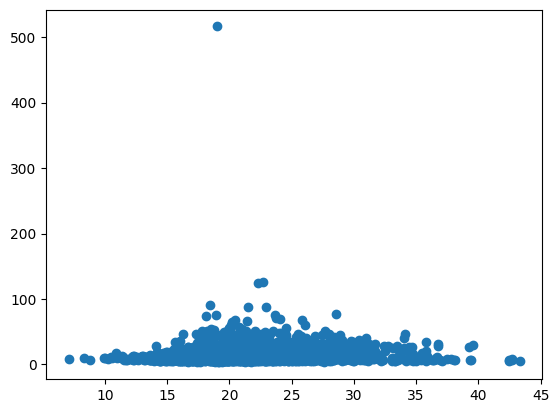

In [75]:
plot_linear = plt.scatter(y_values, x_values)

Form this plot we can see a few key details, namely: 
1) Our data has a few outliers.  
2) Our data does follow a linear relationship with most values condensed around the centre point of the volatility scale.  

## OUTLIER REMOVAL 
I will use the method of removing values above Q3 by 1.5*IQR and below Q1 by 1.5IQR

In [ ]:
#Step 1
